In [22]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import cv2 as cv

from tqdm.notebook import tqdm
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import cv2
import scipy.io

In [34]:
hoda = scipy.io.loadmat('Data_hoda_full.mat')
X = hoda['Data'].reshape(-1)
X = np.array([cv2.resize(img, dsize=(10, 10)) for img in X])
#X = [cv2.threshold(img, 127, 255,cv2.THRESH_BINARY)[1] for img in X]
#X = np.array([np.reshape(img, newshape=(100,)) for img in X])
y = hoda['labels'].reshape(-1)


#df = load_digits()
#X = df.data
#y = df.target


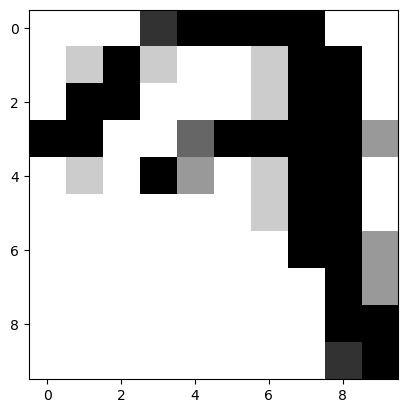

In [37]:
plt.imshow(X[95], cmap='gray_r')

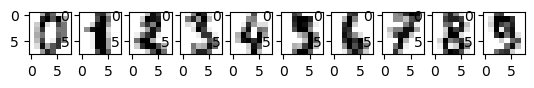

  0 1 2 3 4 5 6 7 8 9 


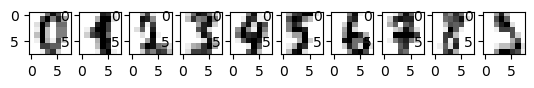

  0 1 2 3 4 5 6 7 8 9 


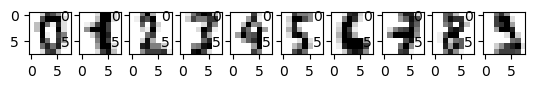

  0 1 2 3 4 5 6 7 8 9 


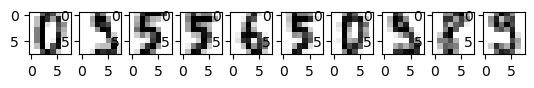

  0 9 5 5 6 5 0 9 8 9 


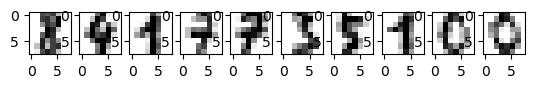

  8 4 1 7 7 3 5 1 0 0 


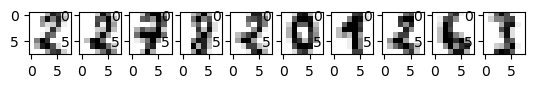

  2 2 7 8 2 0 1 2 6 3 


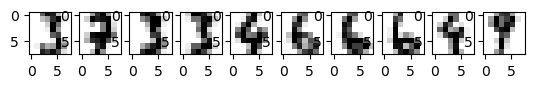

  3 7 3 3 4 6 6 6 4 9 


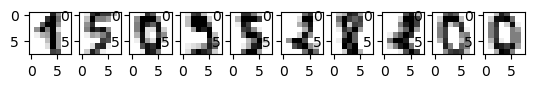

  1 5 0 9 5 2 8 2 0 0 


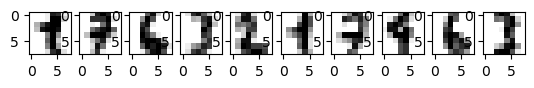

  1 7 6 3 2 1 7 4 6 3 


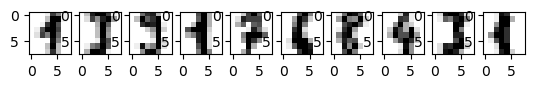

  1 3 9 1 7 6 8 4 3 1 


In [14]:
snum='  '
for i in range(100):
    plt.subplot(1,10,i%10+1)
    img = X[i].reshape(8,8)
    plt.imshow(img, cmap='gray_r')
    snum += str(y[i]) + ' '
    if(i!=0 and (i+1)%10==0):
        plt.show()
        print(snum)
        snum = '  '

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
sigmoid = lambda x : 1/(1+np.exp(-x))

In [17]:
def fit_regression_logistic(X, y):
    W = []
    
    tolerance = 1e-3
    m = len(X)
    X = np.c_[np.ones(m), X]
    
    for c in np.unique(y):
        y1 = pd.factorize(y==c,sort=True)[0].reshape(-1,1)
        alpha = 0.01
        w = np.zeros((X.shape[1],1))

        for epoch in tqdm(range(1000000)):
            y_hat = sigmoid(X.dot(w))

            grad = X.T.dot(y_hat-y1)
            w -= alpha*grad/m

            if np.abs((alpha*grad).mean())<=tolerance:
                break
        W.append(w)
    return W

In [18]:
def predict(X):
    X = np.array(X)
    X = np.c_[np.ones(len(X)), X]
    return np.argmax(sigmoid(X.dot(W)),axis=1)

In [19]:
W = fit_regression_logistic(X_train,y_train)

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [20]:
print('Accuracy train = ',accuracy_score(y_train, predict(X_train)))
print('Accuracy test  = ',accuracy_score(y_test, predict(X_test)))
print('Confusion matrix :\n',confusion_matrix(y, predict(X)))

Accuracy train =  0.9925760950259837
Accuracy test  =  0.9666666666666667
Confusion matrix :
 [[178   0   0   0   0   0   0   0   0   0]
 [  0 179   1   0   1   0   0   0   1   0]
 [  0   0 177   0   0   0   0   0   0   0]
 [  0   0   0 181   0   1   0   0   1   0]
 [  0   3   0   0 176   0   0   0   2   0]
 [  0   0   1   0   0 179   0   0   1   1]
 [  0   0   0   0   0   1 180   0   0   0]
 [  0   0   0   0   0   0   0 178   0   1]
 [  0   5   0   0   0   1   0   0 168   0]
 [  0   0   0   0   1   0   0   0   3 176]]


In [21]:
import joblib
joblib.dump(W,filename='digits.joblib')

['digits.joblib']